In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
from sklearn.neighbors import KernelDensity
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate

# Task1 

Compare the outcomes of different implementations of KDEs.

There are several options available for computing KDE in Python.
- SciPy: gaussian_kde.
- Statsmodels: KDEUnivariate and KDEMultivariate.
- Scikit-learn: KernelDensity.


## 1.1. Generate synthethic data and plot them

Generate synthetic dataset the distribution of which can be presented as a combination of three Gausian distributions with the following parameters: $\mu_1$=1, $\sigma_1$=1 and $\mu_2$=8, $\sigma_2$=2 and $\mu_2$=14, $\sigma_2$=1.5. Generate 1000 samples from the distribution.

Plot the pdf of this distribution and the generated samples.
 

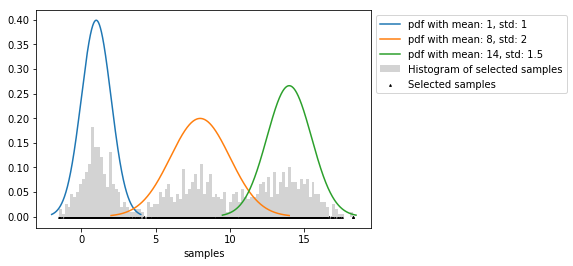

In [2]:
"""
source: 
https://stackoverflow.com/questions/14189937/separate-mixture-of-gaussians-in-python
https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html
"""
mean_std = [[1,1],[8,2],[14,1.5]]
mix=np.array([])
for mean,std in mean_std:
    x = np.linspace(mean-3*std,mean+3*std,1000)
    plt.plot(x,plt.mlab.normpdf(x,mean,std),
             label="pdf with mean: "+str(mean)+", std: "+str(std))
    mix= np.concatenate((mix,np.random.normal(mean,std,1000)))


samples = np.random.choice(mix, 1000)
samples_x = np.full(samples.shape,-0.001) 

plt.hist(samples, bins=samples.size//10, normed=True,
         label="Histogram of selected samples",color='lightgrey')

plt.scatter(samples,samples_x,c='k',marker='^',s=3,
            label="Selected samples")
plt.xlabel('samples')
plt.legend(bbox_to_anchor = (1,1),loc= 2)
plt.show()


## 1.2. Use the generated samples to perform 

### 1.2.1.  KDE with Scipy

In [3]:
x = np.linspace(np.min(samples)-5,np.max(samples)+5)

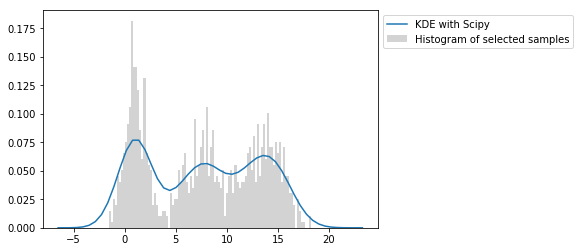

In [4]:
scipy_kde=stats.gaussian_kde(samples)
plt.plot(x,scipy_kde.evaluate(x),label = 'KDE with Scipy')
plt.hist(samples, bins=samples.size//10, normed=True,
         label="Histogram of selected samples",color='lightgrey')
plt.legend(bbox_to_anchor = (1,1),loc= 2)
plt.show()

### 1.2.2. Univariate KDE with Statsmodels

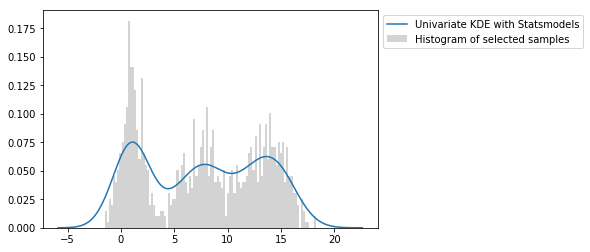

In [5]:
"""
source:
http://www.statsmodels.org/dev/examples/notebooks/generated/kernel_density.html
"""
statsmod_univariate_kde = KDEUnivariate(samples)
statsmod_univariate_kde.fit()
plt.hist(samples, bins=samples.size//10, normed=True,
         label="Histogram of selected samples",color='lightgrey')
plt.plot(statsmod_univariate_kde.support, statsmod_univariate_kde.density, 
         label= 'Univariate KDE with Statsmodels')
plt.legend(bbox_to_anchor = (1,1),loc= 2)
plt.show()

### 1.2.3. Multivariate KDE with Statsmodels

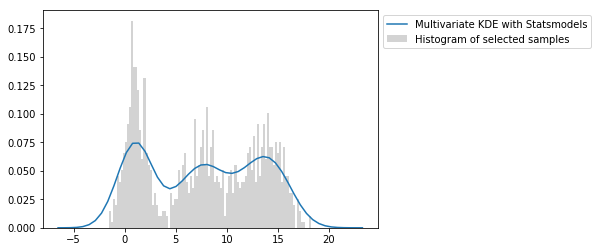

In [6]:
statsmod_multivariate_kde = KDEMultivariate(samples, var_type= 'c')
plt.hist(samples, bins=samples.size//10, normed=True,
         label="Histogram of selected samples",color='lightgrey')
plt.plot(x, statsmod_multivariate_kde.pdf(x), 
         label= 'Multivariate KDE with Statsmodels')
plt.legend(bbox_to_anchor = (1,1),loc= 2)
plt.show()

### 1.2.4. KDE with Scikit-learn

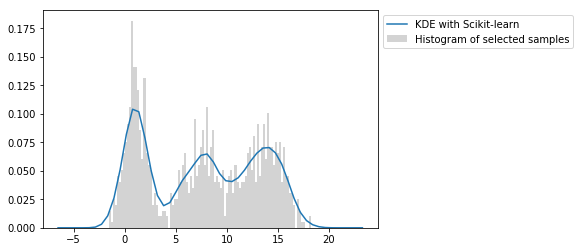

In [7]:
"""
Source:
http://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html
"""
scikitlearn_kde = KernelDensity(kernel='gaussian', 
                                bandwidth=0.75).fit(samples[:, np.newaxis])
plt.hist(samples, bins=samples.size//10, normed=True,
         label="Histogram of selected samples",color='lightgrey')
plt.plot(x, np.exp(scikitlearn_kde.score_samples(x[:,np.newaxis])),
         label= 'KDE with Scikit-learn')
plt.legend(bbox_to_anchor = (1,1),loc= 2)
plt.show()


## 1.3 Plot all four distributions on one figure. 

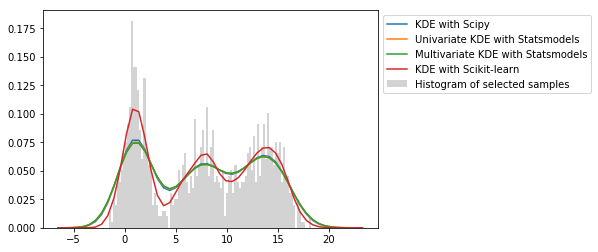

In [8]:
plt.hist(samples, bins=samples.size//10, normed=True,
         label="Histogram of selected samples",color='lightgrey')
plt.plot(x,scipy_kde.evaluate(x),label = 'KDE with Scipy')
plt.plot(statsmod_univariate_kde.support, statsmod_univariate_kde.density, 
         label= 'Univariate KDE with Statsmodels')
plt.plot(x, statsmod_multivariate_kde.pdf(x), 
         label= 'Multivariate KDE with Statsmodels')
plt.plot(x, np.exp(scikitlearn_kde.score_samples(x[:,np.newaxis])),
         label= 'KDE with Scikit-learn')

plt.legend(loc=2,bbox_to_anchor=(1,1))
plt.show()